## **Explore Brooklyn: Stay near Indian Restaurants, Start Business too**

### **Introduction:**

New York is the most densely populated area in United States. It's one of the World's most populous Megacities too. New York City has been described as the cultural,financial and media capital of the world, and exerts a significant impact upon commerce, entertainment, research, technology, education, politics, tourism, art, fashion, and sports. New York City is in reality a collection of many neighbourhoods scattered among the city’s five boroughs — Manhattan, Brooklyn, the Bronx, Queens, and Staten Island—each exhibiting its own lifestyle. Moving from one city neighbourhood to the next may be like passing from one country to another. All five boroughs illustrate this melting pot of cultures through activities, museums, stores and restaurants, where you can meet people of different countries, sample exotic cuisine and products, listen to international music and watch foreign films.

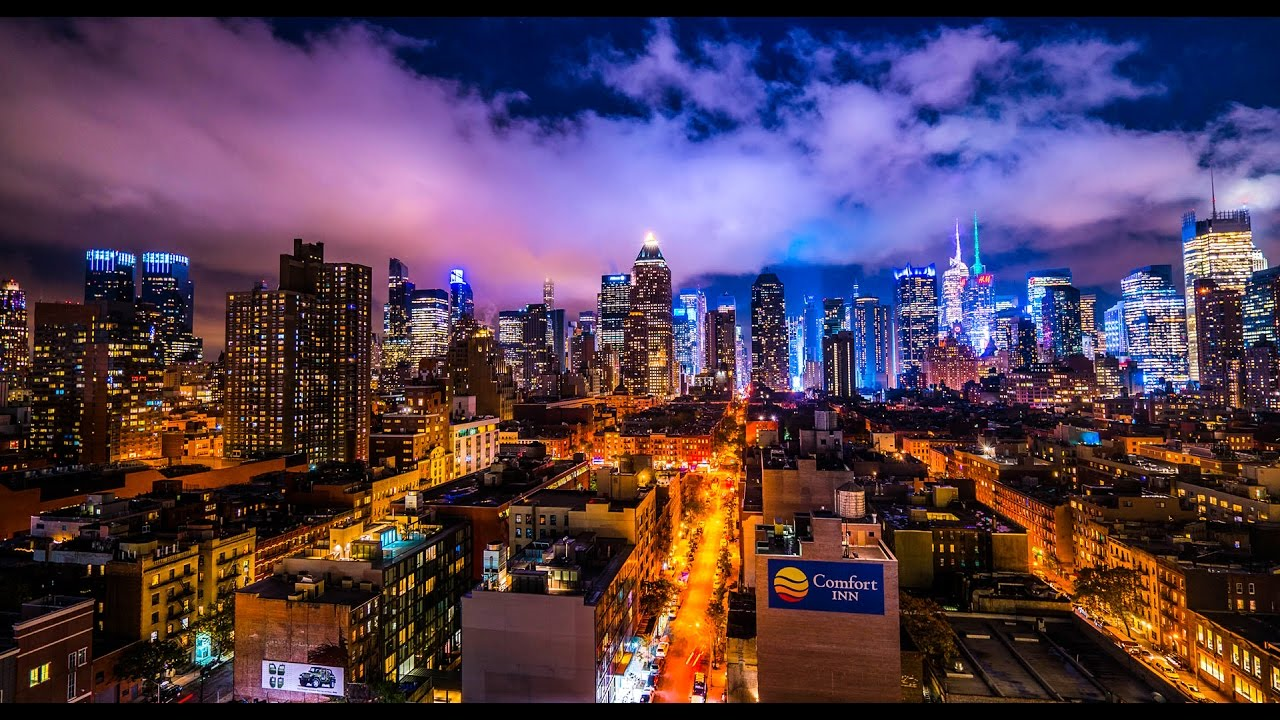

A recent U.S. Census Bureau report about NYC revealed an increasingly diverse and dynamic city with immigrants making up the majority of the residents in some neighborhoods. With almost 200 languages spoken, 40 percent of the NYC population was born outside of the United States. Conquering New York in one visit is impossible.

As the culture is diverse in nature, there will be various food items which birth various restaurants like Chinese, Indian, Italian etc. Here, we'll visit "Brooklyn" and look at the Indian Restaurants.
But, the main motto is like, if someone wants to visit some places, based on his/her likes of food, he/she can select restaurants and also able to decide where to stay to get good Indian, Italian or Chinese food.


In [1]:
!conda install -c conda-forge geopy --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    numpy-1.18.1               |   py36h95a1406_0         5.2 MB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    sci

**Now import all necessary packages/libraries**

In [2]:
import numpy as np
import pandas as pd
import folium 
import json
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors

from geopy.geocoders import Nominatim 
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print('Libraries imported.')

Libraries imported.


In [4]:
# URL="https://cocl.us/new_york_dataset"
# resp = requests.get(URL).json
# resp

<bound method Response.json of <Response [200]>>

#### **Let's download the Dataset and open**

In [3]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [4]:
with open("newyork_data.json") as json_data:
    NY_data = json.load(json_data)
    
NY_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [5]:
features = NY_data["features"]
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

NY_neigh = pd.DataFrame(columns=column_names)

for data in features:
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    NY_neigh = NY_neigh.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

NY_neigh.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [6]:
NY_neigh.dtypes

Borough          object
Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

In [7]:
NY_neigh["Borough"].value_counts()

Queens           81
Brooklyn         70
Staten Island    63
Bronx            52
Manhattan        40
Name: Borough, dtype: int64

In [8]:
countNY_df = NY_neigh.groupby("Borough").count()
countNY_df.head()

Neighborhood  Latitude  Longitude
Borough                                         
Bronx                    52        52         52
Brooklyn                 70        70         70
Manhattan                40        40         40
Queens                   81        81         81
Staten Island            63        63         63

In [9]:
NY_neigh.groupby("Borough")["Neighborhood"].count()

Borough
Bronx            52
Brooklyn         70
Manhattan        40
Queens           81
Staten Island    63
Name: Neighborhood, dtype: int64

In [10]:
sortedNY_df = countNY_df.sort_values(by="Neighborhood", ascending=True)
sortedNY_df.head()

Neighborhood  Latitude  Longitude
Borough                                         
Manhattan                40        40         40
Bronx                    52        52         52
Staten Island            63        63         63
Brooklyn                 70        70         70
Queens                   81        81         81

In [11]:
for index, value in enumerate(sortedNY_df["Neighborhood"]): 
    label = format(int(value), ',')
    print(index,value)

0 40
1 52
2 63
3 70
4 81


#### **Now Let's make a Bar graph**

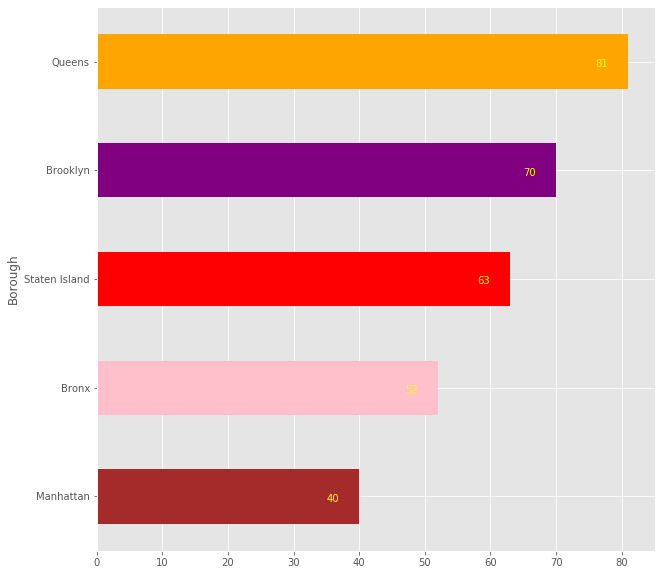

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use('ggplot')

colors_list=["Brown", "Pink", "Red", "Purple", "Orange"]

sortedNY_df["Neighborhood"].plot(kind='barh', figsize=(10, 10), color=colors_list)
for index, value in enumerate(sortedNY_df["Neighborhood"]): 
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-5, index - 0.05 ), color='yellow')

    
plt.show()

#### **From the above bar chart, we can see Queens has maximum number of Restaurant (81) and followed by Brooklyn (70) and others**

#### **Now Let's make a Pie Chart**

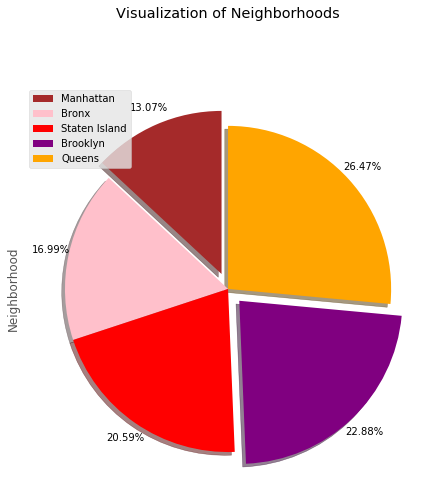

In [12]:
colors_list=["Brown", "Pink", "Red", "Purple", "Orange"]
explode_list=[0.1,0,0,0.1,0]

sortedNY_df["Neighborhood"].plot(kind="pie", figsize = (15, 7.5), autopct = "%1.2f%%", startangle = 90, shadow = True, labels=None, 
                          pctdistance=1.11, colors=colors_list, explode=explode_list)

plt.title("Visualization of Neighborhoods", y=1.15) 
plt.legend(labels = sortedNY_df.index, loc="upper left")
plt.show()

### So, we can see that **Queens** has **maximum** number of neighborhood (26.47% of Total)

In [13]:
NY_neigh["Neighborhood"].value_counts()

Bay Terrace                  2
Chelsea                      2
Murray Hill                  2
Sunnyside                    2
South Jamaica                1
Flatbush                     1
Mott Haven                   1
East New York                1
St. Albans                   1
South Side                   1
Randall Manor                1
Bergen Beach                 1
Fox Hills                    1
Castleton Corners            1
Fresh Meadows                1
Washington Heights           1
Bronxdale                    1
Bath Beach                   1
Great Kills                  1
Bushwick                     1
Rego Park                    1
Willowbrook                  1
Bayswater                    1
Malba                        1
Marine Park                  1
Vinegar Hill                 1
Morris Park                  1
Edenwald                     1
West Village                 1
Richmond Hill                1
Egbertville                  1
Cambria Heights              1
Pelham G

#### **Now Foursquare will come into picture - providing Creds and getting values**

In [14]:
# The code was removed by Watson Studio for sharing.

In [19]:
for row in NY_neigh.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    print(Latitude,Longitude )

40.89470517661 -73.84720052054902
40.87429419303012 -73.82993910812398
40.887555677350775 -73.82780644716412
40.89543742690383 -73.90564259591682
40.890834493891305 -73.9125854610857
40.88168737120521 -73.90281798724604
40.87655077879964 -73.91065965862981
40.89827261213805 -73.86731496814176
40.87722415599446 -73.8793907395681
40.88103887819211 -73.85744642974207
40.866858107252696 -73.83579759808117
40.85741349808865 -73.85475564017999
40.84724670491813 -73.78648845267413
40.870185164975325 -73.8855121841913
40.85572707719664 -73.9104159619131
40.84789792606271 -73.91967159119565
40.86099679638654 -73.89642655981623
40.84269615786053 -73.88735617532338
40.83947505672653 -73.87774474910545
40.836623010706056 -73.9261020935813
40.819754370594936 -73.90942160757436
40.80623874935177 -73.91609987487575
40.801663627756206 -73.91322139386135
40.81509904545822 -73.8957882009446
40.80972987938709 -73.88331505955291
40.82359198585534 -73.90150648943059
40.821012197914015 -73.86574609554924
40

### **Some of my colleagues want to Visit Brooklyn and planned to stay there may be for some months. Let's Visit**

In [15]:
address = str(input("Enter your location"))
# Brooklyn, New York
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of address are {}, {}.'.format(latitude, longitude))

Enter your location Brooklyn, New York


The geograpical coordinate of address are 40.6501038, -73.9495823.


**Now I've got the latitude and longitude of Brooklyn**

### **Analysis Begins here:**

### **Let's Explore Neighborhoods in Brooklyn**

In [16]:
Brooklyn_data = NY_neigh[NY_neigh['Borough'] == 'Brooklyn'].reset_index(drop=True)
Brooklyn_data.head()

Borough Neighborhood   Latitude  Longitude
0  Brooklyn    Bay Ridge  40.625801 -74.030621
1  Brooklyn  Bensonhurst  40.611009 -73.995180
2  Brooklyn  Sunset Park  40.645103 -74.010316
3  Brooklyn   Greenpoint  40.730201 -73.954241
4  Brooklyn    Gravesend  40.595260 -73.973471

In [17]:
len(Brooklyn_data['Longitude'])

70

#### **Now I'm gonna explore the venues of Brooklyn within 500m of radius**

In [30]:
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
#         print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()
        print(results)
        
        results2 = results['response']['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng,
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results2])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude',
                  'ID',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [31]:
Brooklyn_venues = getNearbyVenues(names=Brooklyn_data['Neighborhood'],
                                   latitudes=Brooklyn_data['Latitude'],
                                   longitudes=Brooklyn_data['Longitude']
                                  )

Brooklyn_venues.head()

{'meta': {'code': 200, 'requestId': '5e3ea0e1fb34b5001b960f6e'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': '$-$$$$', 'key': 'price'}, {'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Bay Ridge', 'headerFullLocation': 'Bay Ridge, Brooklyn', 'headerLocationGranularity': 'neighborhood', 'totalResults': 88, 'suggestedBounds': {'ne': {'lat': 40.63030106951066, 'lng': -74.02470273356597}, 'sw': {'lat': 40.62130106051065, 'lng': -74.03653865351028}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b895827f964a5206c2d32e3', 'name': 'Pilo Arts Day Spa and Salon', 'location': {'address': '8412 3rd Ave', 'lat': 40.62474788273414, 'lng': -74.03059056940135, 'labeledLatLngs': [{'label': 'display', 'lat': 40.62474788273414, 'lng': -74.03059056940135}], 'distance': 117, 'pos

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Bay Ridge              40.625801              -74.030621   
1    Bay Ridge              40.625801              -74.030621   
2    Bay Ridge              40.625801              -74.030621   
3    Bay Ridge              40.625801              -74.030621   
4    Bay Ridge              40.625801              -74.030621   

                         ID                        Venue  Venue Latitude  \
0  4b895827f964a5206c2d32e3  Pilo Arts Day Spa and Salon       40.624748   
1  4ad09cf7f964a520bed820e3                    Bagel Boy       40.627896   
2  538ca7d5498ec684c6387a46                Cocoa Grinder       40.623967   
3  4abe4e84f964a520958c20e3                 Pegasus Cafe       40.623168   
4  4ea17d24e5facb29c6d81d6f          Ho' Brah Taco Joint       40.622960   

   Venue Longitude  Venue Category  
0       -74.030591             Spa  
1       -74.029335      Bagel Shop  
2       -74.030863       Juice Bar  
3       -74.031186  Breakfast Spot  
4       -74.031371      Taco Place

In [32]:
Brooklyn_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Bay Ridge              40.625801              -74.030621   
1    Bay Ridge              40.625801              -74.030621   
2    Bay Ridge              40.625801              -74.030621   
3    Bay Ridge              40.625801              -74.030621   
4    Bay Ridge              40.625801              -74.030621   

                         ID                        Venue  Venue Latitude  \
0  4b895827f964a5206c2d32e3  Pilo Arts Day Spa and Salon       40.624748   
1  4ad09cf7f964a520bed820e3                    Bagel Boy       40.627896   
2  538ca7d5498ec684c6387a46                Cocoa Grinder       40.623967   
3  4abe4e84f964a520958c20e3                 Pegasus Cafe       40.623168   
4  4ea17d24e5facb29c6d81d6f          Ho' Brah Taco Joint       40.622960   

   Venue Longitude  Venue Category  
0       -74.030591             Spa  
1       -74.029335      Bagel Shop  
2       -74.030863       Juice Bar  
3       -74.031186  Breakfast Spot  
4       -74.031371      Taco Place

In [33]:
Brooklyn_venues.to_csv("Brooklyn_Venues.csv")

In [34]:
Brooklyn_venues.groupby("Venue Category").count()

Neighborhood  Neighborhood Latitude  \
Venue Category                                                                  
Accessories Store                                    1                      1   
Airport Terminal                                     1                      1   
American Restaurant                                 47                     47   
Antique Shop                                         7                      7   
Arepa Restaurant                                     2                      2   
Argentinian Restaurant                               3                      3   
Art Gallery                                         17                     17   
Arts & Crafts Store                                 11                     11   
Arts & Entertainment                                 1                      1   
Asian Restaurant                                    15                     15   
Athletics & Sports                                   5                      5   
Auto Dealership                                      1                      1   
Auto Garage                                          1                      1   
Auto Workshop                                        1                      1   
BBQ Joint                                            8                      8   
Bagel Shop                                          40                     40   
Bakery                                              67                     67   
Bank                                                38                     38   
Bar                                                 88                     88   
Baseball Field                                       4                      4   
Baseball Stadium                                     2                      2   
Basketball Court                                     2                      2   
Beach                                                9                      9   
Beer Bar                                             4                      4   
Beer Garden                                          6                      6   
Beer Store                                           2                      2   
Big Box Store                                        2                      2   
Bike Rental / Bike Share                             3                      3   
Bike Shop                                            1                      1   
Bistro                                               1                      1   
Board Shop                                           2                      2   
Boat or Ferry                                        2                      2   
Bookstore                                           17                     17   
Boutique                                            10                     10   
Boxing Gym                                           5                      5   
Breakfast Spot                                      17                     17   
Brewery                                              6                      6   
Bridge                                               1                      1   
Bubble Tea Shop                                      6                      6   
Buffet                                               1                      1   
Burger Joint                                        30                     30   
Burrito Place                                        3                      3   
Bus Line                                             1                      1   
Bus Station                                         10                     10   
Bus Stop                                             9                      9   
Business Service                                     1                      1   
Butcher                                              2                      2   
Café                                                47                   

#### **Now, my colleagues want to stay in a Neighborhood where they can get good Indian food and other amenities. So, let's explore great Indian Restaurants nearby in each Neighborhood**

In [35]:
IndBrook_Venues = Brooklyn_venues[Brooklyn_venues["Venue Category"]=="Indian Restaurant"].reset_index(drop=True)
IndBrook_Venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0         Bay Ridge              40.625801              -74.030621   
1        Greenpoint              40.730201              -73.954241   
2  Brooklyn Heights              40.695864              -73.993782   
3  Brooklyn Heights              40.695864              -73.993782   
4       Cobble Hill              40.687920              -73.998561   

                         ID                   Venue  Venue Latitude  \
0  545835a1498e820edc6f636f            Bombay Grill       40.622371   
1  51a5445c498ee0f182370cb2          Agra Taj Mahal       40.733321   
2  4b8ffc16f964a520246e33e3           Curry Heights       40.693572   
3  506a2625498e3c434686abbc  Asya Indian Restaurant       40.699607   
4  58e81c67375c4a70bfd5380d            Indian Table       40.685965   

   Venue Longitude     Venue Category  
0       -74.031799  Indian Restaurant  
1       -73.954928  Indian Restaurant  
2       -73.992265  Indian Restaurant  
3       -73.992110  Indian Restaurant  
4       -73.994195  Indian Restaurant

In [36]:
IndBrook_Venues.shape

(16, 8)

#### **Let's see the Indian Restaurants I've got from Foursquare data in Map**

In [37]:
IndBrookRest_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(IndBrook_Venues['Neighborhood Latitude'], IndBrook_Venues['Neighborhood Longitude'], IndBrook_Venues['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(IndBrookRest_map)  
    
IndBrookRest_map

In [38]:
countBrook_df = IndBrook_Venues.groupby("Neighborhood").count()
countBrook_df.head()

Neighborhood Latitude  Neighborhood Longitude  ID  Venue  \
Neighborhood                                                                 
Bay Ridge                             1                       1   1      1   
Boerum Hill                           1                       1   1      1   
Brooklyn Heights                      2                       2   2      2   
Clinton Hill                          3                       3   3      3   
Cobble Hill                           1                       1   1      1   

                  Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                       
Bay Ridge                      1                1               1  
Boerum Hill                    1                1               1  
Brooklyn Heights               2                2               2  
Clinton Hill                   3                3               3  
Cobble Hill                    1                1               1

In [39]:
sorted_Rest = countBrook_df.sort_values(by="Venue", ascending=True)
sorted_Rest.head()


Neighborhood Latitude  Neighborhood Longitude  ID  Venue  \
Neighborhood                                                             
Bay Ridge                         1                       1   1      1   
Boerum Hill                       1                       1   1      1   
Cobble Hill                       1                       1   1      1   
Fort Greene                       1                       1   1      1   
Fulton Ferry                      1                       1   1      1   

              Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                   
Bay Ridge                  1                1               1  
Boerum Hill                1                1               1  
Cobble Hill                1                1               1  
Fort Greene                1                1               1  
Fulton Ferry               1                1               1

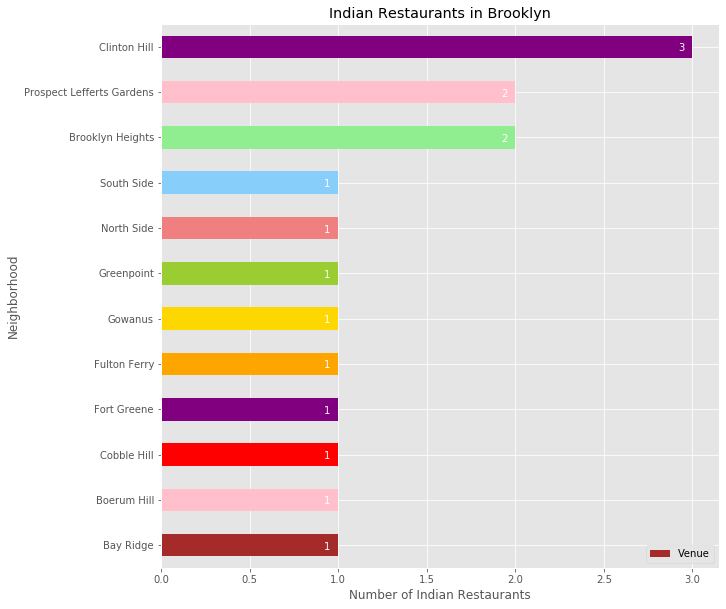

In [40]:
colors_list=["Brown", "Pink", "Red", "Purple", "Orange", 'gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink',  "Purple", "Orange", 'gold']

sorted_Rest["Venue"].plot(kind='barh', figsize=(10, 10), color=colors_list)
for index, value in enumerate(sorted_Rest["Venue"]): 
    label = format(int(value), ',')
    plt.annotate(label, xy=(value - 0.08, index -0.1 ), color='white')
    plt.xlabel("Number of Indian Restaurants")
    plt.title("Indian Restaurants in Brooklyn")
    plt.legend()
   
plt.show()

#### **From the above Bar chart, we can see that Clinton Hill has maximum number (3) of Indian Restaurants, followed by Prospect Lefferts Gardens, Brooklyn Heights and others**

#### **Now, I've to find out Indian Restaurants that people like much and also highly rated**

In [41]:
def detailed_venues(IDs):
    
    
    venues_details=[]
    for id in IDs:
        print(id)
            

        url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
            
        results = requests.get(url).json()
        results_data = results['response']['venue']
        
        venues_details.append([(
            results_data['id'],  
            results_data['name'], 
            results_data['likes']['count'], 
            results_data['rating'],  
            results_data['tips']['count'])])

    BrookInd_detVen = pd.DataFrame([item for venue_details in venues_details for item in venue_details])
    BrookInd_detVen.columns = ['ID', 
                  'Name', 
                  'Likes', 
                  'Ratings', 
                  'Tips']
    
    return(BrookInd_detVen)

In [42]:
IndRest_Brook_Venues = detailed_venues(IDs = IndBrook_Venues["ID"])
                                    
                                  

IndRest_Brook_Venues.head()

545835a1498e820edc6f636f
51a5445c498ee0f182370cb2
4b8ffc16f964a520246e33e3
506a2625498e3c434686abbc
58e81c67375c4a70bfd5380d
52f18573498ec2c34e830ffd
57596dad498e732300496b23
568d3902498e619efcbc3f58
57596dad498e732300496b23
4ace7c86f964a520d3d020e3
543870ec498ec64de510608d
4bb93b70cf2fc9b6fe64a002
4afdf78bf964a520862c22e3
5631511b498e3d6d7e0a4df0
5631511b498e3d6d7e0a4df0
506a2625498e3c434686abbc


ID                    Name  Likes  Ratings  Tips
0  545835a1498e820edc6f636f            Bombay Grill     14      7.0     4
1  51a5445c498ee0f182370cb2          Agra Taj Mahal     34      7.2    16
2  4b8ffc16f964a520246e33e3           Curry Heights     31      7.2    17
3  506a2625498e3c434686abbc  Asya Indian Restaurant     55      6.7    27
4  58e81c67375c4a70bfd5380d            Indian Table     26      7.5    11

In [43]:
IndRest_Brook_Venues.shape

(16, 5)

In [44]:
IndBrook_Venues_cpy = IndBrook_Venues
IndBrook_Venues_cpy.rename(columns={"Venue": "Name"}, inplace=True)
IndBrook_Venues_cpy.drop(['Venue Latitude', 'Venue Longitude', 'Venue Category'], axis=1, inplace=True)

IndBrook_Venues_cpy.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0         Bay Ridge              40.625801              -74.030621   
1        Greenpoint              40.730201              -73.954241   
2  Brooklyn Heights              40.695864              -73.993782   
3  Brooklyn Heights              40.695864              -73.993782   
4       Cobble Hill              40.687920              -73.998561   

                         ID                    Name  
0  545835a1498e820edc6f636f            Bombay Grill  
1  51a5445c498ee0f182370cb2          Agra Taj Mahal  
2  4b8ffc16f964a520246e33e3           Curry Heights  
3  506a2625498e3c434686abbc  Asya Indian Restaurant  
4  58e81c67375c4a70bfd5380d            Indian Table

In [45]:
IndRest_Brook_Venues

ID                        Name  Likes  Ratings  Tips
0   545835a1498e820edc6f636f                Bombay Grill     14      7.0     4
1   51a5445c498ee0f182370cb2              Agra Taj Mahal     34      7.2    16
2   4b8ffc16f964a520246e33e3               Curry Heights     31      7.2    17
3   506a2625498e3c434686abbc      Asya Indian Restaurant     55      6.7    27
4   58e81c67375c4a70bfd5380d                Indian Table     26      7.5    11
5   52f18573498ec2c34e830ffd   Kanan's Indian Restaurant     23      7.8     8
6   57596dad498e732300496b23                 Dosa Royale     75      8.7    22
7   568d3902498e619efcbc3f58               Spice & Grill     19      7.6     6
8   57596dad498e732300496b23                 Dosa Royale     75      8.7    22
9   4ace7c86f964a520d3d020e3                    Kinara's      9      5.8    20
10  543870ec498ec64de510608d                Masala Grill     39      8.0    14
11  4bb93b70cf2fc9b6fe64a002  Gandhi Fine Indian Cuisine     81      8.6    47
12  4afdf78bf964a520862c22e3             King of Tandoor     25      7.1    23
13  5631511b498e3d6d7e0a4df0          Tikka Indian Grill     95      8.5    29
14  5631511b498e3d6d7e0a4df0          Tikka Indian Grill     95      8.5    29
15  506a2625498e3c434686abbc      Asya Indian Restaurant     55      6.7    27

In [46]:
IndRest_Brook_Merged3 = pd.merge(IndRest_Brook_Venues, IndBrook_Venues_cpy, on='ID')
IndRest_Brook_Merged3


ID                      Name_x  Likes  Ratings  \
0   545835a1498e820edc6f636f                Bombay Grill     14      7.0   
1   51a5445c498ee0f182370cb2              Agra Taj Mahal     34      7.2   
2   4b8ffc16f964a520246e33e3               Curry Heights     31      7.2   
3   506a2625498e3c434686abbc      Asya Indian Restaurant     55      6.7   
4   506a2625498e3c434686abbc      Asya Indian Restaurant     55      6.7   
5   506a2625498e3c434686abbc      Asya Indian Restaurant     55      6.7   
6   506a2625498e3c434686abbc      Asya Indian Restaurant     55      6.7   
7   58e81c67375c4a70bfd5380d                Indian Table     26      7.5   
8   52f18573498ec2c34e830ffd   Kanan's Indian Restaurant     23      7.8   
9   57596dad498e732300496b23                 Dosa Royale     75      8.7   
10  57596dad498e732300496b23                 Dosa Royale     75      8.7   
11  57596dad498e732300496b23                 Dosa Royale     75      8.7   
12  57596dad498e732300496b23                 Dosa Royale     75      8.7   
13  568d3902498e619efcbc3f58               Spice & Grill     19      7.6   
14  4ace7c86f964a520d3d020e3                    Kinara's      9      5.8   
15  543870ec498ec64de510608d                Masala Grill     39      8.0   
16  4bb93b70cf2fc9b6fe64a002  Gandhi Fine Indian Cuisine     81      8.6   
17  4afdf78bf964a520862c22e3             King of Tandoor     25      7.1   
18  5631511b498e3d6d7e0a4df0          Tikka Indian Grill     95      8.5   
19  5631511b498e3d6d7e0a4df0          Tikka Indian Grill     95      8.5   
20  5631511b498e3d6d7e0a4df0          Tikka Indian Grill     95      8.5   
21  5631511b498e3d6d7e0a4df0          Tikka Indian Grill     95      8.5   

    Tips               Neighborhood  Neighborhood Latitude  \
0      4                  Bay Ridge              40.625801   
1     16                 Greenpoint              40.730201   
2     17           Brooklyn Heights              40.695864   
3     27           Brooklyn Heights              40.695864   
4     27               Fulton Ferry              40.703281   
5     27           Brooklyn Heights              40.695864   
6     27               Fulton Ferry              40.703281   
7     11                Cobble Hill              40.687920   
8      8                    Gowanus              40.673931   
9     22                Fort Greene              40.688527   
10    22               Clinton Hill              40.693229   
11    22                Fort Greene              40.688527   
12    22               Clinton Hill              40.693229   
13     6               Clinton Hill              40.693229   
14    20               Clinton Hill              40.693229   
15    14                Boerum Hill              40.685683   
16    47  Prospect Lefferts Gardens              40.658420   
17    23  Prospect Lefferts Gardens              40.658420   
18    29                 North Side              40.714823   
19    29                 South Side              40.710861   
20    29                 North Side              40.714823   
21    29                 South Side              40.710861   

    Neighborhood Longitude                      Name_y  
0               -74.030621                Bombay Grill  
1               -73.954241              Agra Taj Mahal  
2               -73.993782               Curry Heights  
3               -73.993782      Asya Indian Restaurant  
4               -73.995508      Asya Indian Restaurant  
5               -73.993782      Asya Indian Restaurant  
6               -73.995508      Asya Indian Restaurant  
7               -73.998561                Indian Table  
8               -73.994441   Kanan's Indian Restaurant  
9               -73.972906                 Dosa Royale  
10              -73.967843                 Dosa Royale  
11              -73.972906                 Dosa Royale  
12              -73.967843                 Dosa Royale  
13              -73.967843               Spice & Gri

In [48]:
IndRest_Brook_Merged3.to_csv("Indian_Restaurants_Details_in_Brooklyn.csv", index=False)

In [49]:
IndRest_Brook_Merged3.drop_duplicates(subset =["ID"], keep = "first", inplace = True)
IndRest_Brook_Merged3.head()

ID                  Name_x  Likes  Ratings  Tips  \
0  545835a1498e820edc6f636f            Bombay Grill     14      7.0     4   
1  51a5445c498ee0f182370cb2          Agra Taj Mahal     34      7.2    16   
2  4b8ffc16f964a520246e33e3           Curry Heights     31      7.2    17   
3  506a2625498e3c434686abbc  Asya Indian Restaurant     55      6.7    27   
7  58e81c67375c4a70bfd5380d            Indian Table     26      7.5    11   

       Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0         Bay Ridge              40.625801              -74.030621   
1        Greenpoint              40.730201              -73.954241   
2  Brooklyn Heights              40.695864              -73.993782   
3  Brooklyn Heights              40.695864              -73.993782   
7       Cobble Hill              40.687920              -73.998561   

                   Name_y  
0            Bombay Grill  
1          Agra Taj Mahal  
2           Curry Heights  
3  Asya Indian Restaurant  
7            Indian Table

In [50]:
IndRest_Brook_Merged3.shape

(13, 9)

In [51]:
sorted_Ratings = IndRest_Brook_Merged3.sort_values(by="Ratings", ascending=False)
sorted_Ratings=sorted_Ratings.reset_index(drop=True)

sorted_Ratings.head()


ID                      Name_x  Likes  Ratings  Tips  \
0  57596dad498e732300496b23                 Dosa Royale     75      8.7    22   
1  4bb93b70cf2fc9b6fe64a002  Gandhi Fine Indian Cuisine     81      8.6    47   
2  5631511b498e3d6d7e0a4df0          Tikka Indian Grill     95      8.5    29   
3  543870ec498ec64de510608d                Masala Grill     39      8.0    14   
4  52f18573498ec2c34e830ffd   Kanan's Indian Restaurant     23      7.8     8   

                Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0                Fort Greene              40.688527              -73.972906   
1  Prospect Lefferts Gardens              40.658420              -73.954899   
2                 North Side              40.714823              -73.958809   
3                Boerum Hill              40.685683              -73.983748   
4                    Gowanus              40.673931              -73.994441   

                       Name_y  
0                 Dosa Royale  
1  Gandhi Fine Indian Cuisine  
2          Tikka Indian Grill  
3                Masala Grill  
4   Kanan's Indian Restaurant

In [52]:
sorted_Likes = IndRest_Brook_Merged3.sort_values(by="Likes", ascending=False)
sorted_Likes=sorted_Likes.reset_index(drop=True)

sorted_Likes.head()

ID                      Name_x  Likes  Ratings  Tips  \
0  5631511b498e3d6d7e0a4df0          Tikka Indian Grill     95      8.5    29   
1  4bb93b70cf2fc9b6fe64a002  Gandhi Fine Indian Cuisine     81      8.6    47   
2  57596dad498e732300496b23                 Dosa Royale     75      8.7    22   
3  506a2625498e3c434686abbc      Asya Indian Restaurant     55      6.7    27   
4  543870ec498ec64de510608d                Masala Grill     39      8.0    14   

                Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0                 North Side              40.714823              -73.958809   
1  Prospect Lefferts Gardens              40.658420              -73.954899   
2                Fort Greene              40.688527              -73.972906   
3           Brooklyn Heights              40.695864              -73.993782   
4                Boerum Hill              40.685683              -73.983748   

                       Name_y  
0          Tikka Indian Grill  
1  Gandhi Fine Indian Cuisine  
2                 Dosa Royale  
3      Asya Indian Restaurant  
4                Masala Grill

In [65]:
concat_Rating = sorted_Ratings.copy()
concat_Rating.head()

ID                      Name_x  Likes  Ratings  Tips  \
0  57596dad498e732300496b23                 Dosa Royale     75      8.7    22   
1  4bb93b70cf2fc9b6fe64a002  Gandhi Fine Indian Cuisine     81      8.6    47   
2  5631511b498e3d6d7e0a4df0          Tikka Indian Grill     95      8.5    29   
3  543870ec498ec64de510608d                Masala Grill     39      8.0    14   
4  52f18573498ec2c34e830ffd   Kanan's Indian Restaurant     23      7.8     8   

                Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0                Fort Greene              40.688527              -73.972906   
1  Prospect Lefferts Gardens              40.658420              -73.954899   
2                 North Side              40.714823              -73.958809   
3                Boerum Hill              40.685683              -73.983748   
4                    Gowanus              40.673931              -73.994441   

                       Name_y  
0                 Dosa Royale  
1  Gandhi Fine Indian Cuisine  
2          Tikka Indian Grill  
3                Masala Grill  
4   Kanan's Indian Restaurant

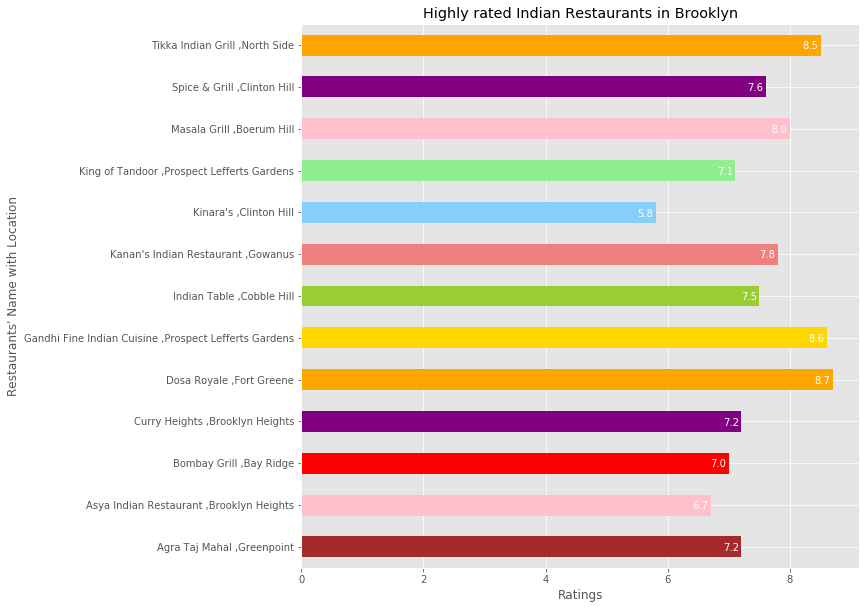

In [73]:
# concat_Rating = sorted_Ratings.copy()

concat_Rating["Rest. with Loc"] = concat_Rating["Name_x"].str.cat(concat_Rating["Neighborhood"],sep=" ,") #Create a separate column which contains (Name_x ,Neighborhood)
sorted_ConcatRating = concat_Rating.groupby("Rest. with Loc").mean()

colors_list=["Brown", "Pink", "Red", "Purple", "Orange", 'gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink',  "Purple", "Orange"]

sorted_ConcatRating["Ratings"].plot(kind='barh', figsize=(10, 10), color=colors_list)
for index, value in enumerate(sorted_ConcatRating["Ratings"]): 
    label = format(float(value), ',')
    plt.annotate(label, xy=(value - 0.3, index -0.1 ), color='white')
    plt.xlabel("Ratings")
    plt.ylabel("Restaurants' Name with Location")
    plt.title("Highly rated Indian Restaurants in Brooklyn")
#     plt.legend()
   
plt.show()

#### **From above bar chart, we can see that Dosa Royale which is in Fort Greene is highly rated (8.7) and others are also very close to each other**

#### **I can also tell that, if anyone wants to open Restaurants in Brooklyn, based on the dishes the Restaurants in the above Bar chart can be the competitiors**

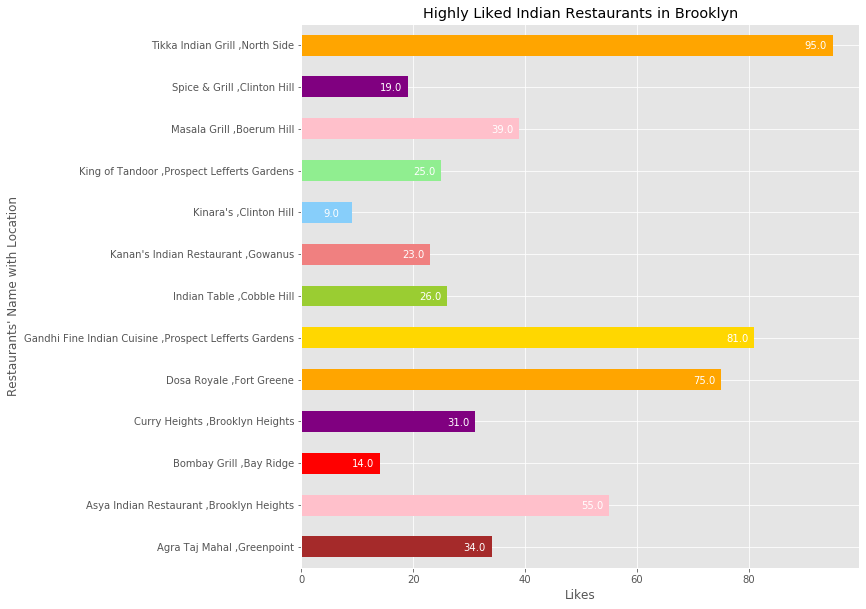

In [76]:
concat_Likes = sorted_Likes.copy()

concat_Likes["Rest. with Likes"] = concat_Likes["Name_x"].str.cat(concat_Likes["Neighborhood"],sep=" ,") #Create a separate column which contains (Name_x ,Neighborhood)
sorted_ConcatLikes = concat_Likes.groupby("Rest. with Likes").mean()

colors_list=["Brown", "Pink", "Red", "Purple", "Orange", 'gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink',  "Purple", "Orange"]

sorted_ConcatLikes["Likes"].plot(kind='barh', figsize=(10, 10), color=colors_list)
for index, value in enumerate(sorted_ConcatLikes["Likes"]): 
    label = format(float(value), ',')
    plt.annotate(label, xy=(value - 5, index -0.1 ), color='white')
    plt.xlabel("Likes")
    plt.ylabel("Restaurants' Name with Location")
    plt.title("Highly Liked Indian Restaurants in Brooklyn")
#     plt.legend()
   
plt.show()

#### **From above chart, we can see that Tikka Indian Grill in North side is highly liked (95) restaurant. From previous chart, we can see Tikka Indian Grill also gets very good rating (8.5). Highly rated Dosa Royale gets good likes(75)**

#### **Okay...!!! Now we've found out which neighborhood has which Indian Restaurants and also about their ratings and likes, but only Indian Restaurants?? These can be one of the Main reasons but not Only reason. Let's find out other amenities nearby**

### **Let's Explore other places in Brooklyn**

In [77]:

print('There are {} uniques categories.'.format(len(Brooklyn_venues['Venue Category'].unique())))

There are 288 uniques categories.


In [79]:
# one hot encoding
Brook_onehot = pd.get_dummies(Brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Brook_onehot['Neighborhood'] = Brooklyn_venues['Neighborhood'] 

Brook_onehot.head()


Accessories Store  Airport Terminal  American Restaurant  Antique Shop  \
0                  0                 0                    0             0   
1                  0                 0                    0             0   
2                  0                 0                    0             0   
3                  0                 0                    0             0   
4                  0                 0                    0             0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Arts & Crafts Store  \
0                 0                       0            0                    0   
1                 0                       0            0                    0   
2                 0                       0            0                    0   
3                 0                       0            0                    0   
4                 0                       0            0                    0   

   Arts & Entertainment  Asian Restaurant  Athletics & Sports  \
0                     0                 0                   0   
1                     0                 0                   0   
2                     0                 0                   0   
3                     0                 0                   0   
4                     0                 0                   0   

   Auto Dealership  Auto Garage  Auto Workshop  BBQ Joint  Bagel Shop  Bakery  \
0                0            0              0          0           0       0   
1                0            0              0          0           1       0   
2                0            0              0          0           0       0   
3                0            0              0          0           0       0   
4                0            0              0          0           0       0   

   Bank  Bar  Baseball Field  Baseball Stadium  Basketball Court  Beach  \
0     0    0               0                 0                 0      0   
1     0    0               0                 0                 0      0   
2     0    0               0                 0                 0      0   
3     0    0               0                 0                 0      0   
4     0    0               0                 0                 0      0   

   Beer Bar  Beer Garden  Beer Store  Big Box Store  Bike Rental / Bike Share  \
0         0            0           0              0                         0   
1         0            0           0              0                         0   
2         0            0           0              0                         0   
3         0            0           0              0                         0   
4         0            0           0              0                         0   

   Bike Shop  Bistro  Board Shop  Boat or Ferry  Bookstore  Boutique  \
0          0       0           0              0          0         0   
1          0       0           0              0          0         0   
2          0       0           0              0          0         0   
3          0       0           0              0          0         0   
4          0       0           0              0          0         0   

   Boxing Gym  Breakfast Spot  Brewery  Bridge  Bubble Tea Shop  Buffet  \
0           0               0        0       0                0       0   
1           0               0        0       0                0       0   
2           0               0        0       0                0       0   
3           0               1        0       0                0       0   
4           0               0        0       0                0       0   

   Burger Joint  Burrito Place  Bus Line  Bus Station  Bus Stop  \
0             0              0         0            0         0   
1             0              0         0            0         0   
2             0              0         0            0         0   
3             0              0         0            0         0   
4             0   

In [80]:
l = Brook_onehot.columns.get_loc("Neighborhood")
l

183

In [82]:
print(len(Brook_onehot.columns))
[Brook_onehot.columns[l]]

288


['Neighborhood']

In [83]:
fixed_columns = [Brook_onehot.columns[l]] + list(Brook_onehot.columns[:-1])
Brook_onehot = Brook_onehot[fixed_columns]

In [84]:
Brook_onehot.head()

Neighborhood  Accessories Store  Airport Terminal  American Restaurant  \
0    Bay Ridge                  0                 0                    0   
1    Bay Ridge                  0                 0                    0   
2    Bay Ridge                  0                 0                    0   
3    Bay Ridge                  0                 0                    0   
4    Bay Ridge                  0                 0                    0   

   Antique Shop  Arepa Restaurant  Argentinian Restaurant  Art Gallery  \
0             0                 0                       0            0   
1             0                 0                       0            0   
2             0                 0                       0            0   
3             0                 0                       0            0   
4             0                 0                       0            0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  Auto Dealership  Auto Garage  Auto Workshop  BBQ Joint  \
0                   0                0            0              0          0   
1                   0                0            0              0          0   
2                   0                0            0              0          0   
3                   0                0            0              0          0   
4                   0                0            0              0          0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0           0       0     0    0               0                 0   
1           1       0     0    0               0                 0   
2           0       0     0    0               0                 0   
3           0       0     0    0               0                 0   
4           0       0     0    0               0                 0   

   Basketball Court  Beach  Beer Bar  Beer Garden  Beer Store  Big Box Store  \
0                 0      0         0            0           0              0   
1                 0      0         0            0           0              0   
2                 0      0         0            0           0              0   
3                 0      0         0            0           0              0   
4                 0      0         0            0           0              0   

   Bike Rental / Bike Share  Bike Shop  Bistro  Board Shop  Boat or Ferry  \
0                         0          0       0           0              0   
1                         0          0       0           0              0   
2                         0          0       0           0              0   
3                         0          0       0           0              0   
4                         0          0       0           0              0   

   Bookstore  Boutique  Boxing Gym  Breakfast Spot  Brewery  Bridge  \
0          0         0           0               0        0       0   
1          0         0           0               0        0       0   
2          0         0           0               0        0       0   
3          0         0           0               1        0       0   
4          0         0           0               0        0       0   

   Bubble Tea Shop  Buffet  Burger Joint  Burrito Place  Bus Line  \
0                0       0             0              0         0   
1                0       0             0              0         0   
2                0       0             0              0         0   
3                0       0             0              0         0   
4                0       0             0              0         0   

   Bus St

**Time to Delete Duplicate Neighborhood**

In [85]:
Brook_onehot1 = Brook_onehot.loc[:,~Brook_onehot.columns.duplicated()]
Brook_onehot1.head()

Neighborhood  Accessories Store  Airport Terminal  American Restaurant  \
0    Bay Ridge                  0                 0                    0   
1    Bay Ridge                  0                 0                    0   
2    Bay Ridge                  0                 0                    0   
3    Bay Ridge                  0                 0                    0   
4    Bay Ridge                  0                 0                    0   

   Antique Shop  Arepa Restaurant  Argentinian Restaurant  Art Gallery  \
0             0                 0                       0            0   
1             0                 0                       0            0   
2             0                 0                       0            0   
3             0                 0                       0            0   
4             0                 0                       0            0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  Auto Dealership  Auto Garage  Auto Workshop  BBQ Joint  \
0                   0                0            0              0          0   
1                   0                0            0              0          0   
2                   0                0            0              0          0   
3                   0                0            0              0          0   
4                   0                0            0              0          0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0           0       0     0    0               0                 0   
1           1       0     0    0               0                 0   
2           0       0     0    0               0                 0   
3           0       0     0    0               0                 0   
4           0       0     0    0               0                 0   

   Basketball Court  Beach  Beer Bar  Beer Garden  Beer Store  Big Box Store  \
0                 0      0         0            0           0              0   
1                 0      0         0            0           0              0   
2                 0      0         0            0           0              0   
3                 0      0         0            0           0              0   
4                 0      0         0            0           0              0   

   Bike Rental / Bike Share  Bike Shop  Bistro  Board Shop  Boat or Ferry  \
0                         0          0       0           0              0   
1                         0          0       0           0              0   
2                         0          0       0           0              0   
3                         0          0       0           0              0   
4                         0          0       0           0              0   

   Bookstore  Boutique  Boxing Gym  Breakfast Spot  Brewery  Bridge  \
0          0         0           0               0        0       0   
1          0         0           0               0        0       0   
2          0         0           0               0        0       0   
3          0         0           0               1        0       0   
4          0         0           0               0        0       0   

   Bubble Tea Shop  Buffet  Burger Joint  Burrito Place  Bus Line  \
0                0       0             0              0         0   
1                0       0             0              0         0   
2                0       0             0              0         0   
3                0       0             0              0         0   
4                0       0             0              0         0   

   Bus St

In [86]:
Brook_onehot1.shape

(2789, 287)

#### **Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category**

In [88]:
Brooklyn_grouped = Brook_onehot1.groupby('Neighborhood').mean().reset_index()
Brooklyn_grouped.head()

Neighborhood  Accessories Store  Airport Terminal  \
0          Bath Beach                0.0               0.0   
1           Bay Ridge                0.0               0.0   
2  Bedford Stuyvesant                0.0               0.0   
3         Bensonhurst                0.0               0.0   
4        Bergen Beach                0.0               0.0   

   American Restaurant  Antique Shop  Arepa Restaurant  \
0             0.000000           0.0               0.0   
1             0.034091           0.0               0.0   
2             0.000000           0.0               0.0   
3             0.000000           0.0               0.0   
4             0.000000           0.0               0.0   

   Argentinian Restaurant  Art Gallery  Arts & Crafts Store  \
0                     0.0          0.0             0.000000   
1                     0.0          0.0             0.011364   
2                     0.0          0.0             0.000000   
3                     0.0          0.0             0.000000   
4                     0.0          0.0             0.000000   

   Arts & Entertainment  Asian Restaurant  Athletics & Sports  \
0                   0.0          0.020833            0.000000   
1                   0.0          0.011364            0.000000   
2                   0.0          0.000000            0.000000   
3                   0.0          0.000000            0.000000   
4                   0.0          0.000000            0.142857   

   Auto Dealership  Auto Garage  Auto Workshop  BBQ Joint  Bagel Shop  \
0              0.0          0.0            0.0   0.000000    0.000000   
1              0.0          0.0            0.0   0.000000    0.022727   
2              0.0          0.0            0.0   0.037037    0.037037   
3              0.0          0.0            0.0   0.000000    0.030303   
4              0.0          0.0            0.0   0.000000    0.000000   

     Bakery      Bank       Bar  Baseball Field  Baseball Stadium  \
0  0.020833  0.020833  0.000000        0.000000               0.0   
1  0.000000  0.011364  0.034091        0.000000               0.0   
2  0.000000  0.000000  0.074074        0.000000               0.0   
3  0.060606  0.030303  0.000000        0.000000               0.0   
4  0.000000  0.000000  0.000000        0.142857               0.0   

   Basketball Court  Beach  Beer Bar  Beer Garden  Beer Store  Big Box Store  \
0          0.000000    0.0       0.0          0.0         0.0            0.0   
1          0.000000    0.0       0.0          0.0         0.0            0.0   
2          0.037037    0.0       0.0          0.0         0.0            0.0   
3          0.000000    0.0       0.0          0.0         0.0            0.0   
4          0.000000    0.0       0.0          0.0         0.0            0.0   

   Bike Rental / Bike Share  Bike Shop  Bistro  Board Shop  Boat or Ferry  \
0                       0.0        0.0     0.0         0.0            0.0   
1                       0.0        0.0     0.0         0.0            0.0   
2                       0.0        0.0     0.0         0.0            0.0   
3                       0.0        0.0     0.0         0.0            0.0   
4                       0.0        0.0     0.0         0.0            0.0   

   Bookstore  Boutique  Boxing Gym  Breakfast Spot  Brewery  Bridge  \
0   0.000000  0.000000         0.0        0.000000      0.0     0.0   
1   0.011364  0.000000         0.0        0.011364      0.0     0.0   
2   0.000000  0.037037         0.0        0.000000      0.0     0.0   
3   0.000000  0.000000         0.0        0.000000      0.0     0.0   
4   0.000000  0.000000         0.0        0.000000      0.0     0.0   

   Bubble Tea Shop  Buffet  Burger Joint  Burrito Place  Bus Line  \
0         0.041667     0.0      0.020833            0.0       0.0   
1         0.000000     0.0      0.011364            0.0       0.0   
2         0.000000     0.0      0.000000            0.0       0.0   
3         0.0000

#### **As per my previous observations of Indian Restaurant, my colleague will decide where to stay so that besides Indian Restaurants other amenities will be available**

#### **We'll see the top 5 places of the Neighborhoods from my previous Indian Restaurants' observation**

In [90]:
num_top_venues=int(input("Enter how many venues"))

for hood in IndRest_Brook_Merged3['Neighborhood']:
    print("*****"+hood+"*****")
    
    temp = Brooklyn_grouped[Brooklyn_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})   #### My note: Here float will be rounded to 2
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

Enter how many venues 5


*****Bay Ridge*****
                 venue  freq
0   Italian Restaurant  0.07
1                  Spa  0.06
2  American Restaurant  0.03
3          Pizza Place  0.03
4   Chinese Restaurant  0.03


*****Greenpoint*****
          venue  freq
0           Bar  0.09
1  Cocktail Bar  0.06
2   Coffee Shop  0.06
3   Pizza Place  0.06
4          Café  0.03


*****Brooklyn Heights*****
                venue  freq
0                Park  0.04
1       Deli / Bodega  0.04
2                 Gym  0.03
3      Cosmetics Shop  0.03
4  Italian Restaurant  0.03


*****Brooklyn Heights*****
                venue  freq
0                Park  0.04
1       Deli / Bodega  0.04
2                 Gym  0.03
3      Cosmetics Shop  0.03
4  Italian Restaurant  0.03


*****Cobble Hill*****
          venue  freq
0   Coffee Shop  0.04
1    Playground  0.04
2   Pizza Place  0.04
3           Bar  0.04
4  Cocktail Bar  0.03


*****Gowanus*****
                    venue  freq
0                     Bar  0.06
1      Italian Re

#### **From above we can see all the other top 5 amenities of the Neighborhood from the previous Indian Restaurant Dataset. They can choose as per their next priorities**

In [91]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [93]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Brooklyn_venues_sorted = pd.DataFrame(columns=columns)
Brooklyn_venues_sorted['Neighborhood'] = Brooklyn_grouped['Neighborhood']

for ind in np.arange(Brooklyn_grouped.shape[0]):
    Brooklyn_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Brooklyn_grouped.iloc[ind, :], num_top_venues)

Brooklyn_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0          Bath Beach    Chinese Restaurant              Pharmacy   
1           Bay Ridge    Italian Restaurant                   Spa   
2  Bedford Stuyvesant           Coffee Shop                  Café   
3         Bensonhurst           Pizza Place          Dessert Shop   
4        Bergen Beach       Harbor / Marina            Donut Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Pizza Place       Bubble Tea Shop    Italian Restaurant   
1   American Restaurant      Greek Restaurant    Chinese Restaurant   
2           Pizza Place                   Bar             BBQ Joint   
3            Donut Shop    Chinese Restaurant        Ice Cream Shop   
4     Other Repair Shop    Athletics & Sports        Baseball Field   

  6th Most Common Venue    7th Most Common Venue 8th Most Common Venue  \
0      Sushi Restaurant     Fast Food Restaurant            Donut Shop   
1           Pizza Place                      Bar        Sandwich Place   
2   Fried Chicken Joint  Fruit & Vegetable Store              Boutique   
3    Italian Restaurant                   Bakery      Sushi Restaurant   
4            Playground        Food & Drink Shop                  Food   

     9th Most Common Venue 10th Most Common Venue  
0             Liquor Store         Clothing Store  
1                 Pharmacy       Sushi Restaurant  
2  New American Restaurant           Gourmet Shop  
3            Grocery Store            Flower Shop  
4              Flower Shop            Flea Market

In [123]:
# # Brooklyn_venues_sorted["Neighborhood"].loc["North Side"]
# Values=[]
# for Hood in IndRest_Brook_Merged3['Neighborhood']:
#     print(Hood)
#     Brooklyn_venues_sorted_New = Brooklyn_venues_sorted[Brooklyn_venues_sorted["Neighborhood"]==Hood]
#     Values.append([Brooklyn_venues_sorted_New])
#     ind_venues = pd.DataFrame([item for item in Values])
# ind_venues.columns = ['Neighborhood', 
#                   '1st Most Common Venue', 
#                   '2nd Most Common Venue',
#                   '3rd Most Common Venue',
#                   '4th Most Common Venue', 
#                   '5th Most Common Venue', 
#                   '6th Most Common Venue', '7th Most Common Venue', '8th Most Common Venue', '9th Most Common Venue']
# #                   '10th Most Common Venue']
    
# ind_venues.head()

In [113]:
NewBrooklyn_venues_sorted=Brooklyn_venues_sorted.set_index('Neighborhood')
NewBrooklyn_venues_sorted.head()

1st Most Common Venue 2nd Most Common Venue  \
Neighborhood                                                     
Bath Beach            Chinese Restaurant              Pharmacy   
Bay Ridge             Italian Restaurant                   Spa   
Bedford Stuyvesant           Coffee Shop                  Café   
Bensonhurst                  Pizza Place          Dessert Shop   
Bergen Beach             Harbor / Marina            Donut Shop   

                   3rd Most Common Venue 4th Most Common Venue  \
Neighborhood                                                     
Bath Beach                   Pizza Place       Bubble Tea Shop   
Bay Ridge            American Restaurant      Greek Restaurant   
Bedford Stuyvesant           Pizza Place                   Bar   
Bensonhurst                   Donut Shop    Chinese Restaurant   
Bergen Beach           Other Repair Shop    Athletics & Sports   

                   5th Most Common Venue 6th Most Common Venue  \
Neighborhood                                                     
Bath Beach            Italian Restaurant      Sushi Restaurant   
Bay Ridge             Chinese Restaurant           Pizza Place   
Bedford Stuyvesant             BBQ Joint   Fried Chicken Joint   
Bensonhurst               Ice Cream Shop    Italian Restaurant   
Bergen Beach              Baseball Field            Playground   

                      7th Most Common Venue 8th Most Common Venue  \
Neighborhood                                                        
Bath Beach             Fast Food Restaurant            Donut Shop   
Bay Ridge                               Bar        Sandwich Place   
Bedford Stuyvesant  Fruit & Vegetable Store              Boutique   
Bensonhurst                          Bakery      Sushi Restaurant   
Bergen Beach              Food & Drink Shop                  Food   

                      9th Most Common Venue 10th Most Common Venue  
Neighborhood                                                        
Bath Beach                     Liquor Store         Clothing Store  
Bay Ridge                          Pharmacy       Sushi Restaurant  
Bedford Stuyvesant  New American Restaurant           Gourmet Shop  
Bensonhurst                   Grocery Store            Flower Shop  
Bergen Beach                    Flower Shop            Flea Market

#### **The above dataset is very useful if they/anyone want to travel other places. They just have search the name of the Neighborhood and they'll able to see the Top 10 common venues** 

#### **Now, their next priorities are like eating Chinese, joining Gym. Let's find out the places and then decide where to stay**

### **Let's Explore Chinese Restaurants:**

In [134]:
ChinBrook_Venues = Brooklyn_venues[Brooklyn_venues["Venue Category"]=="Chinese Restaurant"].reset_index(drop=True)

countBrook_chin = ChinBrook_Venues.groupby("Neighborhood").count()
sorted_Chin = countBrook_chin.sort_values(by="Venue", ascending=False)
sorted_Chin.head()


Neighborhood Latitude  Neighborhood Longitude  ID  Venue  \
Neighborhood                                                             
Bath Beach                        4                       4   4      4   
South Side                        3                       3   3      3   
Homecrest                         3                       3   3      3   
Clinton Hill                      3                       3   3      3   
Bay Ridge                         3                       3   3      3   

              Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                   
Bath Beach                 4                4               4  
South Side                 3                3               3  
Homecrest                  3                3               3  
Clinton Hill               3                3               3  
Bay Ridge                  3                3               3

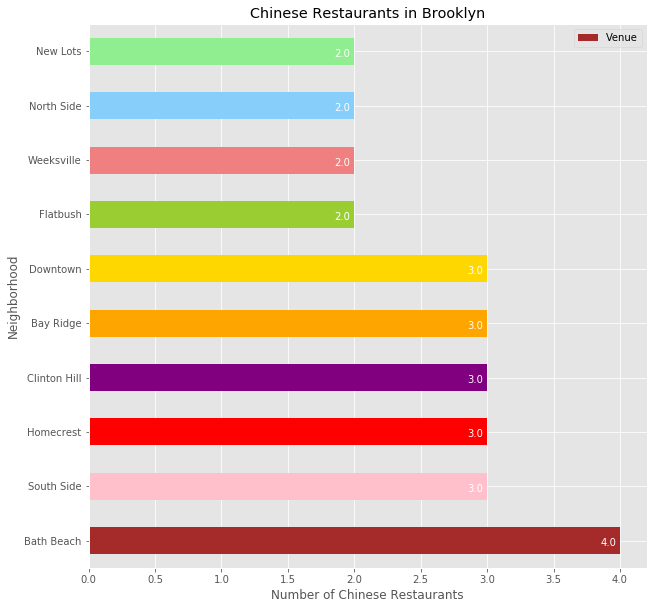

In [143]:
colors_list=["Brown", "Pink", "Red", "Purple", "Orange", 'gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
sorted_Chin = sorted_Chin.head(10)
sorted_Chin["Venue"].plot(kind='barh', figsize=(10, 10), color=colors_list)
for index, value in enumerate(sorted_Chin["Venue"]): 
    label = format(float(value), ',')
    plt.annotate(label, xy=(value - 0.15, index -0.1 ), color='white')
    plt.xlabel("Number of Chinese Restaurants")
    plt.title("Chinese Restaurants in Brooklyn")
    plt.legend()
   
plt.show()

#### **We can see that Bath Beach has got maximum number of Chinese Restaurants (4). We can also take a look of other Restaurants too.**

### **Let's explore Gym or Fitness Centre:**

In [139]:
GymBrook_Venues = Brooklyn_venues[Brooklyn_venues["Venue Category"]=="Gym / Fitness Center"].reset_index(drop=True)

countBrook_gym = GymBrook_Venues.groupby("Neighborhood").count()
sorted_Gym = countBrook_gym.sort_values(by="Venue", ascending=False)
sorted_Gym.head()

Neighborhood Latitude  Neighborhood Longitude  ID  Venue  \
Neighborhood                                                                  
Carroll Gardens                        3                       3   3      3   
Gowanus                                3                       3   3      3   
Bay Ridge                              2                       2   2      2   
Brooklyn Heights                       2                       2   2      2   
East Williamsburg                      2                       2   2      2   

                   Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                        
Carroll Gardens                 3                3               3  
Gowanus                         3                3               3  
Bay Ridge                       2                2               2  
Brooklyn Heights                2                2               2  
East Williamsburg               2                2               2

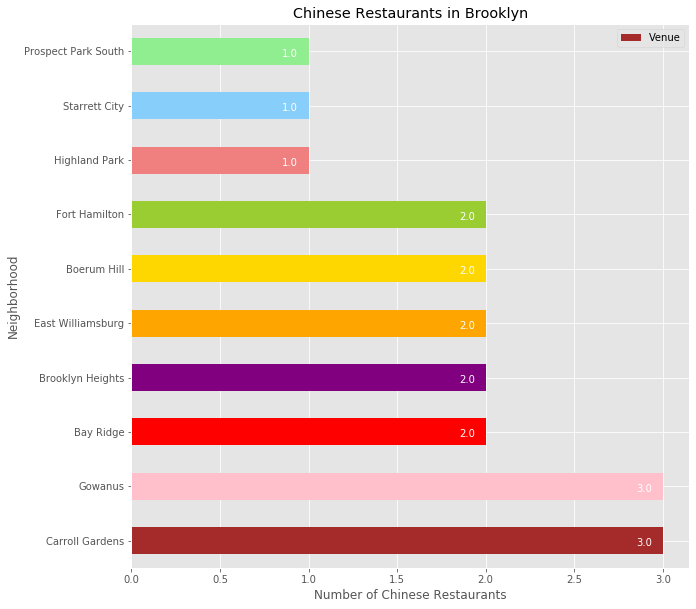

In [144]:
colors_list=["Brown", "Pink", "Red", "Purple", "Orange", 'gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
sorted_Gym = sorted_Gym.head(10)
sorted_Gym["Venue"].plot(kind='barh', figsize=(10, 10), color=colors_list)
for index, value in enumerate(sorted_Gym["Venue"]): 
    label = format(float(value), ',')
    plt.annotate(label, xy=(value - 0.15, index -0.1 ), color='white')
    plt.xlabel("Number of Chinese Restaurants")    ##This should be Gym / Fitness Centre
    plt.title("Chinese Restaurants in Brooklyn")   ##This should be Gym / Fitness Centre
    plt.legend()
   
plt.show()

### **NOTE: from above chart, the title and X-axis should be Gym / Fitness Centre**

#### **So, Caroll Gardens and Gowanus took the place when it comes about Fitness Centre**

## For my Recommendations, please follow my Detailed Report

###  **References:**
#### https://www.greatamericancountry.com/places/local-life/cultural-diversity-in-new-york-city
#### https://en.wikipedia.org/wiki/New_York_City